In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

## Creating the data

The first step is to create the data. This is my training data and I shall use it to find my weights and b value. Note: I am using a training with two sets of features. This is because that would help us plot it in on the graph as well 

In [7]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8]],),
            
            
              1:np.array([[5,1],
                          [6,-1],
                          [7,3],])}

## Training Function

The first step and the most importnant part is to write the fitting function. The fitting functions objective is to write a function that minimizes the value of ||w|| and maximizes the values of b. For this case we would be making a dictionary opt_dict. The opt_dict would hold the values of ||w|| as the key and the value of w and b as the values of the key. In the end we would indentify the smallest key in the dictionary, that is  the value of ||w|| that would make it the smallest.

In [8]:
def fit(data):
    
        ## {||w|| : [w,b]}
        ## The optimization dictionary holds the absolute value of w as the key. The values would hold the w and the value 
        ## of b which is maximized. In the end we would we take the smallest key (w) as the value that is at the bottom of 
        ## the curve. 
        opt_dict = {}
        
        
        transforms = [[1,1],   ## The transforms is because even though the value of ||w|| is the same for all the transform
                     [-1,1],   ## however when mulitplied by w.x + b, the value would change.
                     [1,-1],
                     [1,-1]]
        
        
        all_data = [] ## All data holds the values for all the  datapoints in training point. The for loop is get all the 
                      ## datapoints in the training data
        for yi in data:
            for featureset in data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        max_feature_value = max(all_data) ## The maximum value for all data.
        min_feature_value = min(all_data) ## The minimum value for all data
        del all_data
        
        ## The stepsizes by which the the local minimum value should be found. As the step sizes are increased the jumpes
        ## will be smaller. We are iterating through three stepsizes. And the size of the stepsizes keeps decreasing each
        ## time we complete a loop below
        
        step_sizes = [max_feature_value*0.1,      
                      max_feature_value*0.01,
                      max_feature_value*0.001]
        
        b_range_multiple = 5
        
        b_multiple = 2
        latest_optimum = max_feature_value*10 ## This is the initializing value for the optimizing value
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum]) ## This is the latest_optimum value that was initialized at first
            optimized = False
            while not optimized:
                ## Checking for a range of b values with step sizes
                ## We are creating an array of b values to check. The range would be from the maximum of training data value
                ## to the minimum of the training data value with steps taken with a difference of step*b_multiple
                for b in np.arange(-1*(max_feature_value*b_range_multiple),
                                   max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for i in data:  ## First we take a case at the for the positive values
                            for xi in data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False  ## Could use a break
                                    break ## Breaking because if a single dataset doesnt fit the description then that specifc
                                          ## iteration has to be skipped and the next one would have to be adopted.
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b] ## np.linalg.norm is the sqrt sum of values
                                
                if w[0]<0:
                    optimized = True
                    print('Optimized  a step')
                else:
                    w = w - step   ## If the vlaue is not optimized then we take a step below. 
                    
            norms = sorted([n for n in opt_dict]) ## Sorting the optimum dictionary in the ascending order
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            w = opt_choice[0]
            b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2  ## The latest_optimum if it goes to less than zero then we oscillate
                                                      ## back to a value above that do the whole iteration again till we go back
                                                      ## inside the loop and start the second step iteration. We should be
                    
            ## step*2 by the same value that we multiplied max_value to initalize latest_optimum inorder to keep it uniform but
            ## its okay in this case.

        for i in data:                          
            for xi in data[i]:
                yi=i
                print(xi,':',yi*(np.dot(w,xi)+b))  
                
        return(w,b,min_feature_value, max_feature_value)

## Prediction Function

The predicition function required the testing data set, the values of w and b as the input and assigns the value of the classification of each dataset. It then appends the value of the sign into the class_list and the returns this class_list

In [15]:
class_list = []
def predict(w,b,features):
        # sign( x.w+b )
        for feature in features:
            classification = np.sign(np.dot(np.array(feature),w)+b)
            class_list.append(classification)
        return class_list

Let us run the code now on the training data that we have defined above and see the results. We can see below that all the training points have been learnt and they are all having a value greater that +1. Keep in mind that the condition that SVM should satisfy was
min(||w||) 
given
yi*(xi*w + b) >= 1

Therefore every single point has satisfied this condition and the values are greater than 1. The values of w and b have been printed the following line and we shall also see a plot of the same in a while below. Note: The values that are returned by the 
funciton are the values of w,b,max_value and min_value

## Visualization Function

The visualization function involves plotting the marginal planes(y*x + b = +/- 1) and the hyper plane(y*x + b = 0). The first set of lines of codes involved that. Getting the points for the postive and negative support vector points and plotting them along with the points for the planes that involves the zero points.

The last part involves plotting points the points. I have seperted the training points into circles and the testing points into 
stars. 


In [12]:
def visualize(w,b,max_value,min_value,data_dict,predict_us = 1,classification = 1):
    def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
    
    colors = {1:'r',-1:'b'}
    
    fig1, ax = plt.subplots(figsize=(10,8))
    
    datarange = (min_value*0.9,max_value*1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # (w.x+b) = 1
    # positive support vector hyperplane
    psv1 = hyperplane(hyp_x_min, w, b, 1)
    psv2 = hyperplane(hyp_x_max, w, b, 1)
    ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

    # (w.x+b) = -1
    # negative support vector hyperplane
    nsv1 = hyperplane(hyp_x_min, w, b, -1)
    nsv2 = hyperplane(hyp_x_max, w, b, -1)
    ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')
    
    #w_0 x + w_1 y + w_3 = 1 ## This is parametric equation for the hyper plance in the 2D situation
    ## Therefore in our case it would be:  w[0]*x + w[1]*y + b = 1
    ## Converting this into  for finding y would be: y = (1 - b - w[0]*x)/w[0]

    # (w.x+b) = 0
    # positive support vector hyperplane
    db1 = hyperplane(hyp_x_min, w, b, 0)
    db2 = hyperplane(hyp_x_max, w, b, 0)
    ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
    
            
    if classification == 1 and predict_us == 1:
            [[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict] 
    else:
        for i,x in enumerate(predict_us):
                ax.scatter(x[0],x[1],s=200, marker='*', color=colors[classification[i]])
        
        [[ax.scatter(x[0],x[1],s=100,color=colors[i]) for x in data_dict[i]] for i in data_dict]  



The below chunk of code is used to fit the data and visualize how the training points have been fit

Optimized  a step
Optimized  a step
Optimized  a step
[1 7] : 1.2320000000035094
[2 8] : 1.2320000000035096
[3 8] : 1.008000000003661
[5 1] : 1.007999999994977
[ 6 -1] : 1.6799999999945228
[7 3] : 1.007999999994977
[ 0.224 -0.224] 0.1119999999955823


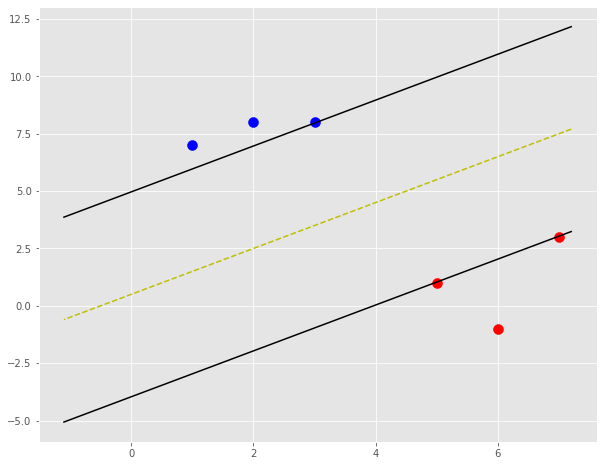

In [13]:
w,b,max_value,min_value = fit(data_dict)
print(w,b)
visualize(w = w,b = b,max_value = max_value,min_value = min_value,data_dict = data_dict)

In [16]:
## This is the testing data and we are predicitng it below and visualizing it with the training data
predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]
classification = predict(w,b,predict_us)

In [17]:
classification = predict(w,b,predict_us)
print(classification)

[-1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0]


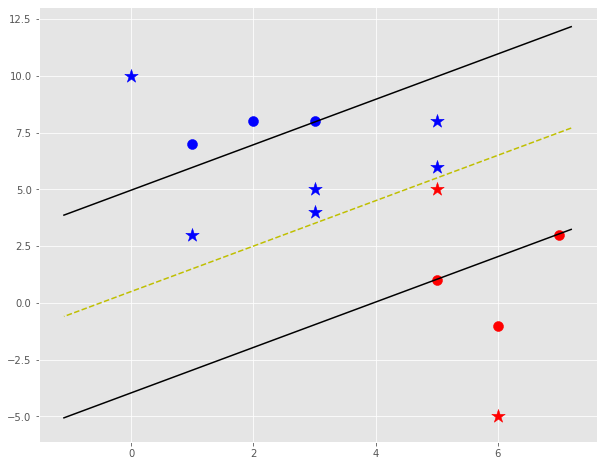

In [18]:
visualize(w = w,b = b,max_value = max_value,min_value = min_value,data_dict = data_dict, predict_us = predict_us,
          classification = classification)